# **HPI vs CPI in the US [2022].**

The goal of this project is to provide an overview of **U.S. Home Prices vs. Consumer Price Index in 2022**.

**1. Business Problem**

Housing prices across the country grow and decline at different rates during 2022. As a means of comparison, the S&P Case Shiller U.S. National Home Price Index (HPI) data is combined and graphed with the United States Consumer Price Index (CPI) data. 2022-Q3 & 2022-Q4 values are missing and need to be predicted to provide a complete overview of the U.S. Home Prices vs. Consumer Price Index in 2022.

**2. Business Assumptions**

* Will the CPI fall behind the growth or change in HPI during 2022?

**3. Solution Strategy**

My solution is to develop a data science project with machine learning forecasting of the Q3 & Q4 data to compare and analyze CPI & HPI performances during the entire year 2022.

**Step 01. Data Description**: In this first section the data will be collected and studied. An initial data description will be carried out to know the data. Therefore some calculations of descriptive statistics will be made.

**Step 02. Data Prediction**: In this section, Timeseries forecasting with machine learning models with linear regression algorithms will be created to assist the EDA. ML models will analyze 75 years of CPI data & 35 years of HPI data. Predictions for Q3 & Q4 2022 will be made.

**Step 03. Data Analysis**: In this section, we will analyze actual data and predicted data to discover unique insights and trends. The difference between `Predicted HPI vs Actual HPI` and `Predicted CPI vs Actual CPI` will be analyzed. Data visualization will provide an accessible way to see and understand trends, outliers, and patterns in data.

**Step 04. Conclusion**: This is a conclusion stage that provides insights needed to answer business questions and present the applicability of the EDA's results in the business context.
____
We will use open-sourced data from Federal Reserve Economic Data | FRED | St. Louis Fed (https://fred.stlouisfed.org).

* CPI Data: CPIAUCSL: Consumer Price Index for All Urban Consumers - FRED
* HPI Data: CSUSHPINSA: S&P/Case-Shiller U.S. National Home Price Index - FRED

*Data is collected on October 4, 2022.*

# Data imports

In [1]:
!pip install fbprophet

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
import pystan
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from fbprophet import Prophet
from IPython.display import HTML, display

import warnings
warnings.filterwarnings("ignore")

# Data Description: CPI

## CPI: The Consumer Price Index

In [3]:
try:
    cpi_data = pd.read_csv("CPIAUCSL.csv",parse_dates = True)
except:
    try:
        cpi_data = pd.read_csv(r'/Users/Admin/Y_privat/CPI_HOUSE/CPIAUCSL.csv',parse_dates = True)
    except:
        cpi_data = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCSL&scale=left&cosd=1947-01-01&coed=2022-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-10-03&revision_date=2022-10-03&nd=1947-01-01",parse_dates = True)

In [4]:
cpi_data['DATE'] = pd.to_datetime(cpi_data['DATE'])
cpi_data.rename(columns = {'DATE':'ds', 'CPIAUCSL':'y'}, inplace = True)

In [5]:
cpi_data.describe(include='all')

,ds,y
count,908,908.000000
unique,908,NaN
top,1947-01-01 00:00:00,NaN
freq,1,NaN
first,1947-01-01 00:00:00,NaN
last,2022-08-01 00:00:00,NaN
mean,NaN,115.782100
std,NaN,81.955808
min,NaN,21.480000
25%,NaN,31.825000


In [6]:
print('Dataset Size:', cpi_data.shape)

Dataset Size: (908, 2)


In [7]:
def current_data(df):
    print('**Data Type**')
    print(df.info())
    print('**5 rows**')
    print(df.head())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Statistic data**')
    print(df.describe(include = 'all'))
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Number of duplicates**')
    print(df.duplicated().sum())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Percentage of missing values**')
    print((df.isna().sum()/len(df)*100))
    print('-------------------------------------------------------------------------------------------------------------')
    #print('**Number of unique values**')
    #print(df.nunique())
    #for column in df.columns:
    #    print('\n', 'Unique values:', column)
    #    print(df[column].unique())

In [8]:
print(current_data(cpi_data))

**Data Type**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      908 non-null    datetime64[ns]
 1   y       908 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.3 KB
None
**5 rows**
          ds      y
0 1947-01-01  21.48
1 1947-02-01  21.62
2 1947-03-01  22.00
3 1947-04-01  22.00
4 1947-05-01  21.95
-------------------------------------------------------------------------------------------------------------
**Statistic data**
                         ds           y
count                   908  908.000000
unique                  908         NaN
top     1947-01-01 00:00:00         NaN
freq                      1         NaN
first   1947-01-01 00:00:00         NaN
last    2022-08-01 00:00:00         NaN
mean                    NaN  115.782100
std                     NaN   81.955808
min                  

- `cpi_data.csv` — 128 lines, 2 columns.

## CPI 2022 (January-August)

In [9]:
cpi_data.tail(8)

,ds,y
900,2022-01-01,281.933
901,2022-02-01,284.182
902,2022-03-01,287.708
903,2022-04-01,288.663
904,2022-05-01,291.474
905,2022-06-01,295.328
906,2022-07-01,295.271
907,2022-08-01,295.620


In [10]:
cpi_data = cpi_data.query("ds >= '2012-01-01'")
cpi_data.head()

,ds,y
780,2012-01-01,227.842
781,2012-02-01,228.329
782,2012-03-01,228.807
783,2012-04-01,229.187
784,2012-05-01,228.713


# CPI Data Prediction

## ML Prediction: CPI 2022 (September - December)

Machine Learning Model Prediction: PROPHET.
Automatic Forecasting Procedure.

In [11]:
#Set the uncertainty interval to 95% (the Prophet default is 80%)
m = Prophet(interval_width=0.95)
m.fit(cpi_data)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=4)
predict = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.17949
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       571.233    0.00033952       208.962           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       588.582     0.0435889       796.525           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        601.72     0.0028815       1278.37           1           1      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       605.298   0.000147478       100.688           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        607.21   0.000320719        223.07           1           1      563   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [12]:
future_dates = m.make_future_dataframe(periods=4, freq='MS')
future_dates.tail(4)

,ds
128,2022-09-01
129,2022-10-01
130,2022-11-01
131,2022-12-01


In [13]:
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
128,2022-09-01,294.677919,292.191070,297.027195
129,2022-10-01,296.244891,293.934182,298.633494
130,2022-11-01,297.780750,295.335534,300.270481
131,2022-12-01,299.161645,296.577622,301.759742


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting. These are:

* **ds**: the datestamp of the forecasted value
* **yhat**: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
* **yhat_lower**: the lower bound of our forecasts
* **yhat_upper**: the upper bound of our forecasts

A variation in values from the output presented is to be expected as **Prophet relies on Markov chain Monte Carlo (MCMC)** methods to generate its forecasts.

MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient function to quickly plot the results of our forecasts as follows:

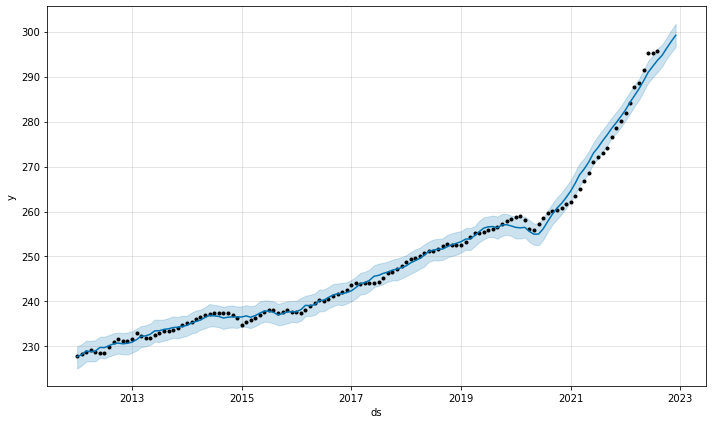

In [14]:
fig1 = m.plot(forecast)

## Insights

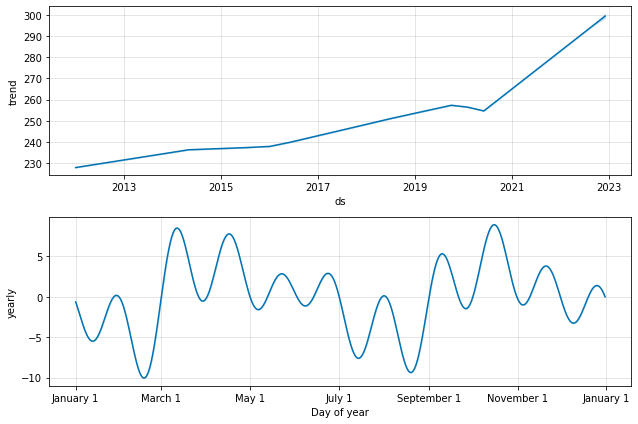

In [15]:
fig2 = m.plot_components(forecast)

The first plot shows that Consumer Price Index has been linearly increasing over time.

The second plot shows peak months for Consumer Price Index: February and October.

Adding ChangePoints to Prophet

* Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

* By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

Let’s plot the vertical lines where the potential changepoints occurred.

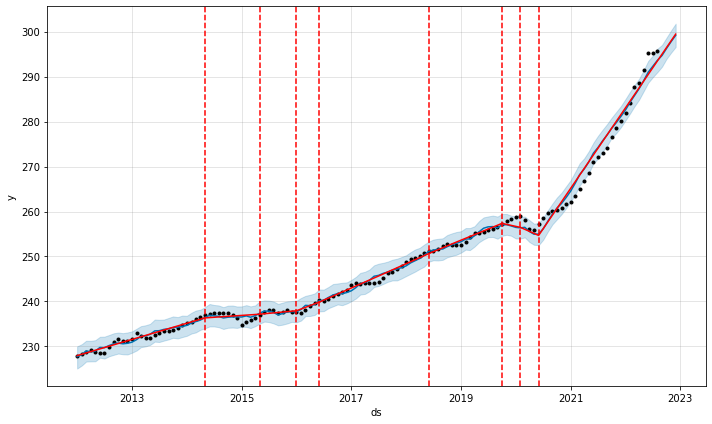

In [16]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

We can view the dates where the chagepoints occurred.

In [17]:
m.changepoints

4     2012-05-01
8     2012-09-01
12    2013-01-01
16    2013-05-01
20    2013-09-01
24    2014-01-01
28    2014-05-01
32    2014-09-01
36    2015-01-01
40    2015-05-01
44    2015-09-01
48    2016-01-01
53    2016-06-01
57    2016-10-01
61    2017-02-01
65    2017-06-01
69    2017-10-01
73    2018-02-01
77    2018-06-01
81    2018-10-01
85    2019-02-01
89    2019-06-01
93    2019-10-01
97    2020-02-01
101   2020-06-01
Name: ds, dtype: datetime64[ns]

In [18]:
pred_2022 = forecast[['ds', 'yhat']].tail(12)

In [19]:
pred_2022

,ds,yhat
120,2022-01-01,282.580933
121,2022-02-01,284.327328
122,2022-03-01,285.742920
123,2022-04-01,287.284430
124,2022-05-01,289.020531
125,2022-06-01,290.962946
126,2022-07-01,292.255947
127,2022-08-01,293.584330
128,2022-09-01,294.677919
129,2022-10-01,296.244891


In [20]:
cpi_data.tail(8)

,ds,y
900,2022-01-01,281.933
901,2022-02-01,284.182
902,2022-03-01,287.708
903,2022-04-01,288.663
904,2022-05-01,291.474
905,2022-06-01,295.328
906,2022-07-01,295.271
907,2022-08-01,295.620


In [21]:
cpi_hist_data = cpi_data.tail(8)
cpi_hist_data

,ds,y
900,2022-01-01,281.933
901,2022-02-01,284.182
902,2022-03-01,287.708
903,2022-04-01,288.663
904,2022-05-01,291.474
905,2022-06-01,295.328
906,2022-07-01,295.271
907,2022-08-01,295.620


## CPI Prediction Results

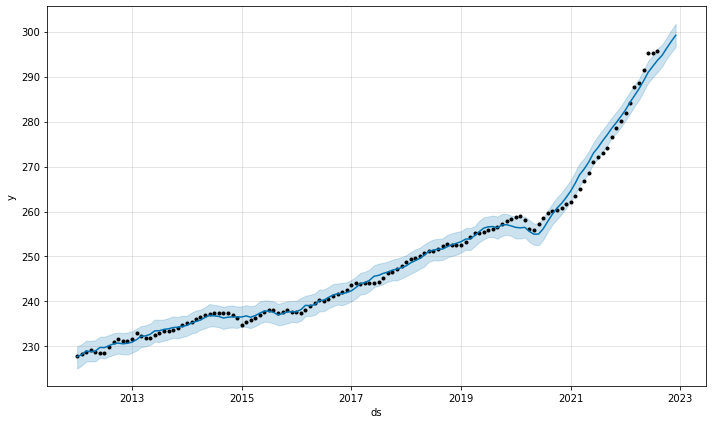

In [22]:
fig1 = m.plot(forecast)

In [23]:
cpi_2022 = pd.merge(cpi_hist_data,pred_2022,how = "right")
cpi_2022.rename(columns = {'y':'cpi_actual_data', 'yhat':'cpi_prediction'}, inplace = True)
cpi_2022

,ds,cpi_actual_data,cpi_prediction
0,2022-01-01,281.933,282.580933
1,2022-02-01,284.182,284.327328
2,2022-03-01,287.708,285.742920
3,2022-04-01,288.663,287.284430
4,2022-05-01,291.474,289.020531
5,2022-06-01,295.328,290.962946
6,2022-07-01,295.271,292.255947
7,2022-08-01,295.620,293.584330
8,2022-09-01,NaN,294.677919
9,2022-10-01,NaN,296.244891


In [24]:
cpi_2022.describe(include='all')

,ds,cpi_actual_data,cpi_prediction
count,12,8.000000,12.000000
unique,12,NaN,NaN
top,2022-01-01 00:00:00,NaN,NaN
freq,1,NaN,NaN
first,2022-01-01 00:00:00,NaN,NaN
last,2022-12-01 00:00:00,NaN,NaN
mean,NaN,290.022375,291.135381
std,NaN,5.290025,5.414043
min,NaN,281.933000,282.580933
25%,NaN,286.826500,286.899053


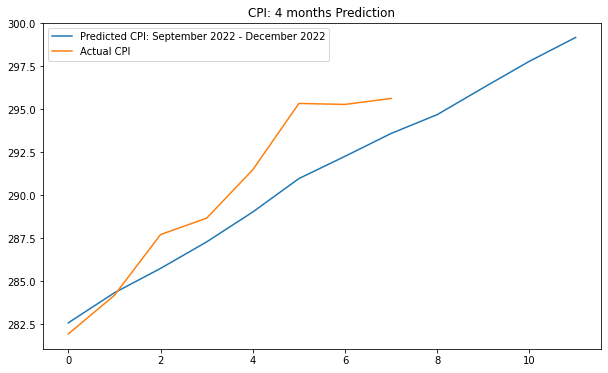

In [25]:
plt.figure(figsize=(10,6))
plt.plot(cpi_2022['cpi_prediction'],label="Predicted CPI: September 2022 - December 2022")
plt.plot(cpi_2022['cpi_actual_data'],label="Actual CPI")
plt.title("CPI: 4 months Prediction")
plt.legend()

# Data Description: HPI

## HPI: U.S. National Home Price Index

In [26]:
try:
    hpi_data = pd.read_csv("CSUSHPINSA.csv",parse_dates = True)
except:
    try:
        hpi_data = pd.read_csv(r'/Users/Admin/Y_privat/CPI_HOUSE/CSUSHPINSA.csv',parse_dates = True)
    except:
        hpi_data = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CSUSHPINSA&scale=left&cosd=1987-01-01&coed=2022-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-10-04&revision_date=2022-10-04&nd=1987-01-01",parse_dates = True)

In [27]:
hpi_data['DATE'] = pd.to_datetime(hpi_data['DATE'])
hpi_data.rename(columns = {'DATE':'ds', 'CSUSHPINSA':'y'}, inplace = True)

In [28]:
hpi_data.describe(include='all')

,ds,y
count,427,427.000000
unique,427,NaN
top,1987-01-01 00:00:00,NaN
freq,1,NaN
first,1987-01-01 00:00:00,NaN
last,2022-07-01 00:00:00,NaN
mean,NaN,136.684405
std,NaN,54.826603
min,NaN,63.734000
25%,NaN,81.643500


In [29]:
print('Dataset Size:', hpi_data.shape)

Dataset Size: (427, 2)


In [30]:
def current_data(df):
    print('**Data Type**')
    print(df.info())
    print('**5 rows**')
    print(df.head())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Statistic data**')
    print(df.describe(include = 'all'))
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Number of duplicates**')
    print(df.duplicated().sum())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Percentage of missing values**')
    print((df.isna().sum()/len(df)*100))
    print('-------------------------------------------------------------------------------------------------------------')
    #print('**Number of unique values**')
    #print(df.nunique())
    #for column in df.columns:
    #    print('\n', 'Unique values:', column)
    #    print(df[column].unique())

In [31]:
print(current_data(hpi_data))

**Data Type**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      427 non-null    datetime64[ns]
 1   y       427 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.8 KB
None
**5 rows**
          ds       y
0 1987-01-01  63.734
1 1987-02-01  64.134
2 1987-03-01  64.470
3 1987-04-01  64.974
4 1987-05-01  65.548
-------------------------------------------------------------------------------------------------------------
**Statistic data**
                         ds           y
count                   427  427.000000
unique                  427         NaN
top     1987-01-01 00:00:00         NaN
freq                      1         NaN
first   1987-01-01 00:00:00         NaN
last    2022-07-01 00:00:00         NaN
mean                    NaN  136.684405
std                     NaN   54.826603
min             

## HPI 2022 (January-July)

In [32]:
display(hpi_data.head(1))
display(hpi_data.tail(1))

,ds,y
0,1987-01-01,63.734


,ds,y
426,2022-07-01,307.447


In [33]:
display(hpi_data.head(1))
display(hpi_data.tail(1))

,ds,y
0,1987-01-01,63.734


,ds,y
426,2022-07-01,307.447


In [34]:
hpi_data.tail(7)

,ds,y
420,2022-01-01,282.026
421,2022-02-01,287.279
422,2022-03-01,295.054
423,2022-04-01,301.655
424,2022-05-01,306.639
425,2022-06-01,308.468
426,2022-07-01,307.447


In [35]:
hpi_data = hpi_data.query("ds >= '2012-01-01'")
hpi_data.head()

,ds,y
300,2012-01-01,134.169
301,2012-02-01,133.997
302,2012-03-01,135.865
303,2012-04-01,138.474
304,2012-05-01,141.052


# HPI Data Prediction

## ML Prediction: HPI 2022 (August - December)

Machine Learning Model Prediction: PROPHET.
Automatic Forecasting Procedure.

In [36]:
#Set the uncertainty interval to 95% (the Prophet default is 80%)
mh = Prophet(interval_width=0.95)
mh.fit(hpi_data)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = mh.make_future_dataframe(periods=5)
predict = mh.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.62715
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99       504.957     0.0131344       1148.76           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       543.647    0.00305783       439.483           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       558.777    0.00194345       481.728           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        567.14    0.00139698       1020.93      0.3605      0.3605      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       574.815    0.

In [37]:
future_dates = mh.make_future_dataframe(periods=5, freq='MS')
future_dates.tail(5)

,ds
127,2022-08-01
128,2022-09-01
129,2022-10-01
130,2022-11-01
131,2022-12-01


In [38]:
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
128,2022-09-01,294.677919,292.254611,297.032922
129,2022-10-01,296.244891,293.978010,298.651630
130,2022-11-01,297.780750,295.443195,300.138801
131,2022-12-01,299.161645,296.681088,301.740970


In [39]:
forecast_hpi = mh.predict(future_dates)
forecast_hpi[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
127,2022-08-01,312.537661,309.589716,315.520233
128,2022-09-01,315.336927,312.318323,318.269556
129,2022-10-01,317.987271,315.284051,321.058634
130,2022-11-01,320.786396,317.762372,323.802434
131,2022-12-01,323.565026,320.129142,327.046631


Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting. These are:

* **ds**: the datestamp of the forecasted value
* **yhat**: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
* **yhat_lower**: the lower bound of our forecasts
* **yhat_upper**: the upper bound of our forecasts

A variation in values from the output presented is to be expected as **Prophet relies on Markov chain Monte Carlo (MCMC)** methods to generate its forecasts.

MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient function to quickly plot the results of our forecasts as follows:

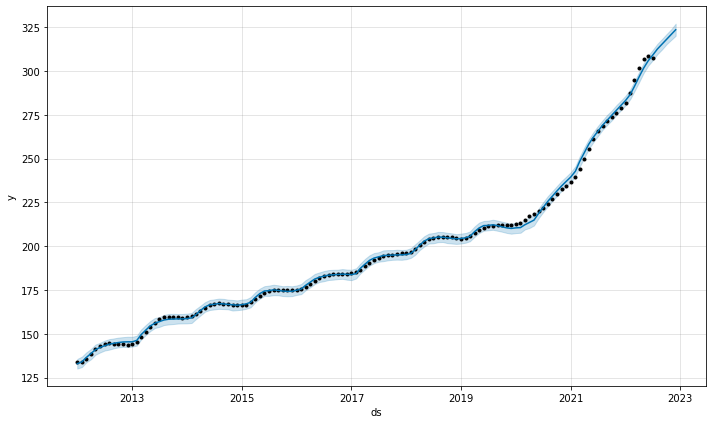

In [40]:
fig3 = mh.plot(forecast_hpi)

## Insights

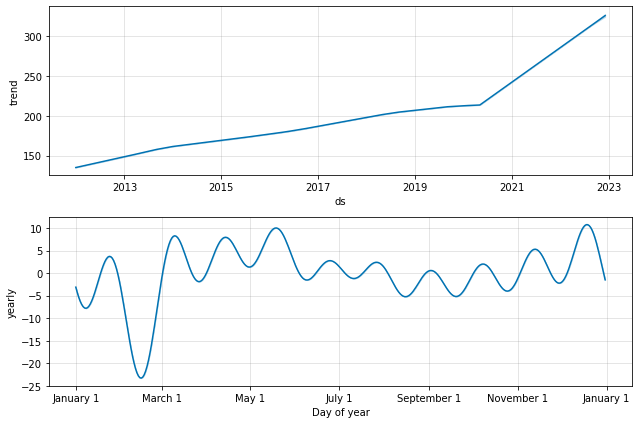

In [41]:
fig4 = mh.plot_components(forecast_hpi)

The first plot shows that Home Price Index has been linearly increasing over time.

The second plot shows peak months for Home Price Index: March, April, May and December.

Adding ChangePoints to Prophet

* Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

* By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

Let’s plot the vertical lines where the potential changepoints occurred.

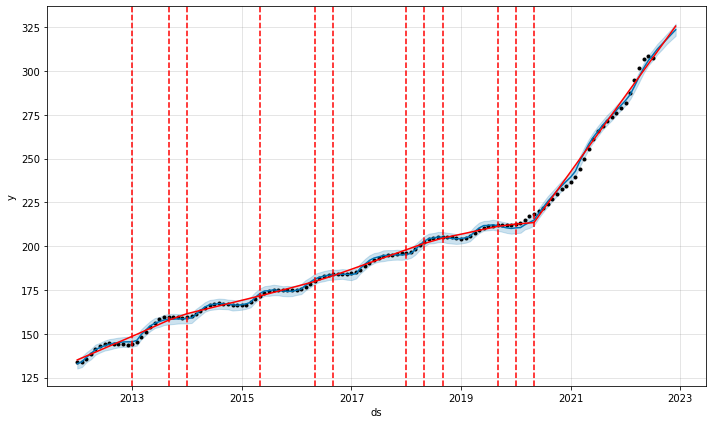

In [42]:
from fbprophet.plot import add_changepoints_to_plot
fig = mh.plot(forecast_hpi)
a = add_changepoints_to_plot(fig.gca(), mh, forecast_hpi)

We can view the dates where the chagepoints occurred.

In [43]:
mh.changepoints

4     2012-05-01
8     2012-09-01
12    2013-01-01
16    2013-05-01
20    2013-09-01
24    2014-01-01
28    2014-05-01
32    2014-09-01
36    2015-01-01
40    2015-05-01
44    2015-09-01
48    2016-01-01
52    2016-05-01
56    2016-09-01
60    2017-01-01
64    2017-05-01
68    2017-09-01
72    2018-01-01
76    2018-05-01
80    2018-09-01
84    2019-01-01
88    2019-05-01
92    2019-09-01
96    2020-01-01
100   2020-05-01
Name: ds, dtype: datetime64[ns]

**HPI Prediction for period 2021-07-01 - 2022-07-01.**

In [44]:
pred_hpi_data_2021_7 = forecast_hpi.query("ds >= '2021-07-01' and ds <= '2022-07-01'")
pred_hpi_data_2021_7 = pred_hpi_data_2021_7[['ds', 'yhat']].round(2)
pred_hpi_data_2021_7

,ds,yhat
114,2021-07-01,265.61
115,2021-08-01,269.07
116,2021-09-01,272.00
117,2021-10-01,274.77
118,2021-11-01,277.60
119,2021-12-01,280.26
120,2022-01-01,283.18
121,2022-02-01,286.62
122,2022-03-01,291.18
123,2022-04-01,296.61


In [45]:
pred_hpi_2022 = forecast_hpi[['ds', 'yhat']].tail(12)

In [46]:
pred_hpi_2022

,ds,yhat
120,2022-01-01,283.178883
121,2022-02-01,286.615477
122,2022-03-01,291.176937
123,2022-04-01,296.612200
124,2022-05-01,301.583961
125,2022-06-01,305.859794
126,2022-07-01,309.067466
127,2022-08-01,312.537661
128,2022-09-01,315.336927
129,2022-10-01,317.987271


In [47]:
hpi_data.tail(7)

,ds,y
420,2022-01-01,282.026
421,2022-02-01,287.279
422,2022-03-01,295.054
423,2022-04-01,301.655
424,2022-05-01,306.639
425,2022-06-01,308.468
426,2022-07-01,307.447


Actual CPI for period:  2021-07-01 - 2022-07-01.

In [48]:
hpi_data_2021_7 = hpi_data.query("ds >= '2021-07-01'")
hpi_data_2021_7

,ds,y
414,2021-07-01,265.574
415,2021-08-01,268.846
416,2021-09-01,271.499
417,2021-10-01,273.710
418,2021-11-01,276.087
419,2021-12-01,278.664
420,2022-01-01,282.026
421,2022-02-01,287.279
422,2022-03-01,295.054
423,2022-04-01,301.655


In [49]:
hpi_hist_data = hpi_data.tail(7)
hpi_hist_data

,ds,y
420,2022-01-01,282.026
421,2022-02-01,287.279
422,2022-03-01,295.054
423,2022-04-01,301.655
424,2022-05-01,306.639
425,2022-06-01,308.468
426,2022-07-01,307.447


## HPI Prediction Results

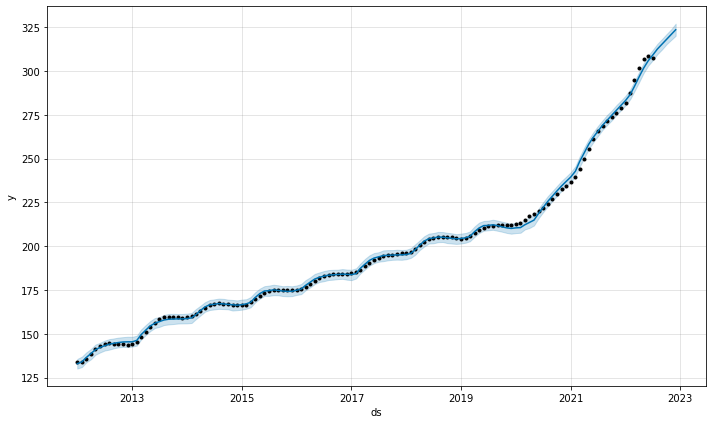

In [50]:
fig3 = mh.plot(forecast_hpi)

Merging of 2021-07 - 2022-07 actual & predicted HPI data.

In [51]:
hpi_2021_7 = pd.merge(hpi_data_2021_7,pred_hpi_data_2021_7,how = "right")
hpi_2021_7.rename(columns = {'y':'hpi_actual_data', 'yhat':'hpi_prediction'}, inplace = True)
hpi_2021_7

,ds,hpi_actual_data,hpi_prediction
0,2021-07-01,265.574,265.61
1,2021-08-01,268.846,269.07
2,2021-09-01,271.499,272.00
3,2021-10-01,273.710,274.77
4,2021-11-01,276.087,277.60
5,2021-12-01,278.664,280.26
6,2022-01-01,282.026,283.18
7,2022-02-01,287.279,286.62
8,2022-03-01,295.054,291.18
9,2022-04-01,301.655,296.61


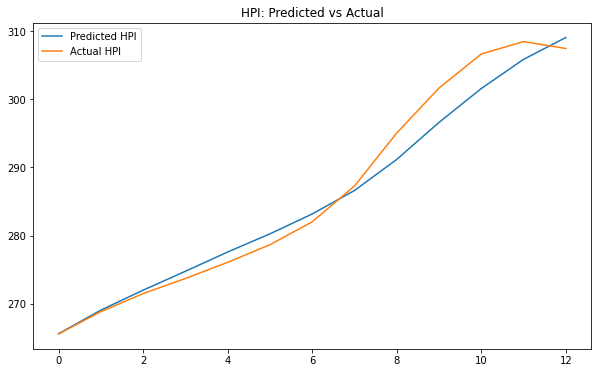

In [52]:
plt.figure(figsize=(10,6))
plt.plot(hpi_2021_7['hpi_prediction'],label="Predicted HPI")
plt.plot(hpi_2021_7['hpi_actual_data'],label="Actual HPI")
plt.title("HPI: Predicted vs Actual")
plt.legend()

Merging of 2022 HPI actual & predicted data.

In [53]:
hpi_2022 = pd.merge(hpi_hist_data,pred_hpi_2022,how = "right")
hpi_2022.rename(columns = {'y':'hpi_actual_data', 'yhat':'hpi_prediction'}, inplace = True)
hpi_2022

,ds,hpi_actual_data,hpi_prediction
0,2022-01-01,282.026,283.178883
1,2022-02-01,287.279,286.615477
2,2022-03-01,295.054,291.176937
3,2022-04-01,301.655,296.612200
4,2022-05-01,306.639,301.583961
5,2022-06-01,308.468,305.859794
6,2022-07-01,307.447,309.067466
7,2022-08-01,NaN,312.537661
8,2022-09-01,NaN,315.336927
9,2022-10-01,NaN,317.987271


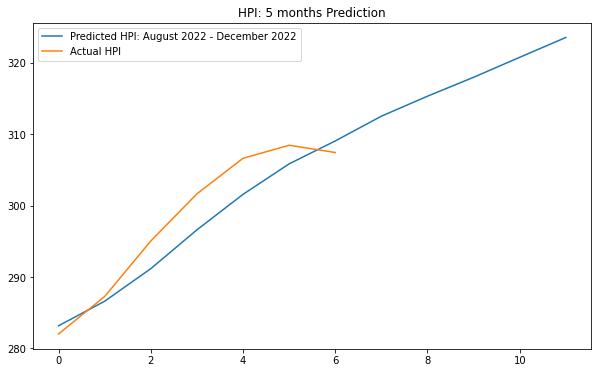

In [54]:
plt.figure(figsize=(10,6))
plt.plot(hpi_2022['hpi_prediction'],label="Predicted HPI: August 2022 - December 2022")
plt.plot(hpi_2022['hpi_actual_data'],label="Actual HPI")
plt.title("HPI: 5 months Prediction")
plt.legend()

In [55]:
cpi_hpi_2022 = pd.merge(hpi_2022,cpi_2022,how = "right")

In [56]:
#cpi_hpi_2022['month'] = cpi_hpi_2022['ds'].dt.month

In [57]:
#cpi_hpi_2022 = cpi_hpi_2022.set_index('month')

In [58]:
cpi_hpi_2022.round(2)

,ds,hpi_actual_data,hpi_prediction,cpi_actual_data,cpi_prediction
0,2022-01-01,282.03,283.18,281.93,282.58
1,2022-02-01,287.28,286.62,284.18,284.33
2,2022-03-01,295.05,291.18,287.71,285.74
3,2022-04-01,301.65,296.61,288.66,287.28
4,2022-05-01,306.64,301.58,291.47,289.02
5,2022-06-01,308.47,305.86,295.33,290.96
6,2022-07-01,307.45,309.07,295.27,292.26
7,2022-08-01,NaN,312.54,295.62,293.58
8,2022-09-01,NaN,315.34,NaN,294.68
9,2022-10-01,NaN,317.99,NaN,296.24


In [59]:
cpi_hpi_2022.head()

,ds,hpi_actual_data,hpi_prediction,cpi_actual_data,cpi_prediction
0,2022-01-01,282.026,283.178883,281.933,282.580933
1,2022-02-01,287.279,286.615477,284.182,284.327328
2,2022-03-01,295.054,291.176937,287.708,285.742920
3,2022-04-01,301.655,296.612200,288.663,287.284430
4,2022-05-01,306.639,301.583961,291.474,289.020531


In [60]:
#cpi_hpi_2022 = cpi_hpi_2022.round(2).T
#pi_hpi_2022.head()

In [61]:
#cpi_hpi_2022.round(2).to_excel('cpi_hpi_2022_2.xlsx', index=False) 

In [62]:
cpi_hpi_2022.reset_index(drop=True, inplace=True)

# Data Analysis

## 2022 Table: CPI & HPI

Table of CPI & HPI for 2022, Actual & Predicted.

In [63]:
cpi_hpi_2022

,ds,hpi_actual_data,hpi_prediction,cpi_actual_data,cpi_prediction
0,2022-01-01,282.026,283.178883,281.933,282.580933
1,2022-02-01,287.279,286.615477,284.182,284.327328
2,2022-03-01,295.054,291.176937,287.708,285.742920
3,2022-04-01,301.655,296.612200,288.663,287.284430
4,2022-05-01,306.639,301.583961,291.474,289.020531
5,2022-06-01,308.468,305.859794,295.328,290.962946
6,2022-07-01,307.447,309.067466,295.271,292.255947
7,2022-08-01,NaN,312.537661,295.620,293.584330
8,2022-09-01,NaN,315.336927,NaN,294.677919
9,2022-10-01,NaN,317.987271,NaN,296.244891


In [64]:
cpi_hpi_2022.describe(include='all')

,ds,hpi_actual_data,hpi_prediction,cpi_actual_data,cpi_prediction
count,12,7.000000,12.000000,8.000000,12.000000
unique,12,NaN,NaN,NaN,NaN
top,2022-01-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2022-12-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,298.366857,305.359000,290.022375,291.135381
std,NaN,10.525062,13.582069,5.290025,5.414043
min,NaN,282.026000,283.178883,281.933000,282.580933
25%,NaN,291.166500,295.253384,286.826500,286.899053


In [65]:
def current_data(df):
    print('**Data Type**')
    print(df.info())
    print('**5 rows**')
    print(df.head())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Statistic data**')
    print(df.describe(include = 'all'))
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Number of duplicates**')
    print(df.duplicated().sum())
    print('-------------------------------------------------------------------------------------------------------------')
    print('**Percentage of missing values**')
    print((df.isna().sum()/len(df)*100))
    print('-------------------------------------------------------------------------------------------------------------')
    #print('**Number of unique values**')
    #print(df.nunique())
    #for column in df.columns:
    #    print('\n', 'Unique values:', column)
    #    print(df[column].unique())

In [66]:
print(current_data(cpi_hpi_2022))

**Data Type**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ds               12 non-null     datetime64[ns]
 1   hpi_actual_data  7 non-null      float64       
 2   hpi_prediction   12 non-null     float64       
 3   cpi_actual_data  8 non-null      float64       
 4   cpi_prediction   12 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 608.0 bytes
None
**5 rows**
          ds  hpi_actual_data  hpi_prediction  cpi_actual_data  cpi_prediction
0 2022-01-01          282.026      283.178883          281.933      282.580933
1 2022-02-01          287.279      286.615477          284.182      284.327328
2 2022-03-01          295.054      291.176937          287.708      285.742920
3 2022-04-01          301.655      296.612200          288.663      287.284430
4 2022-05-01          306.639      301

## 2022 Graphs: CPI & HPI

### Predicted HPI vs Actual HPI

Predicted HPI vs Actual HPI


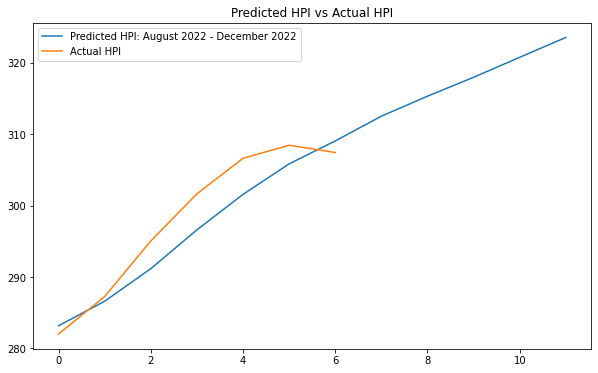

In [67]:
plt.figure(figsize=(10,6))
plt.plot(hpi_2022['hpi_prediction'],label="Predicted HPI: August 2022 - December 2022")
plt.plot(hpi_2022['hpi_actual_data'],label="Actual HPI")
plt.title("Predicted HPI vs Actual HPI")
print('Predicted HPI vs Actual HPI')
plt.legend()

**Predicted HPI vs Actual HPI**
* The difference between Predicted HPI and Actual HPI has been insignificant until March 2022. 
* The observed values were significantly higher than the values predicted by the Machine Learning model from March 2022 until June 2022.

>Q:
Actual HPI was higher than Predicted HPI **February 2022 until June 2022**. Actual CPI had similar perfomance compared to Predicted CPI during the same month. Is that a coincidence or did special events stabilize home prices while pushing inflation up? 

>A: Monthly US GDP rose 0.2% **in June following declines in five of the seven prior months**. Could the growth in GDP cause inflation?
>> Further research is needed.

### Predicted CPI vs Actual CPI

Predicted CPI vs Actual CPI


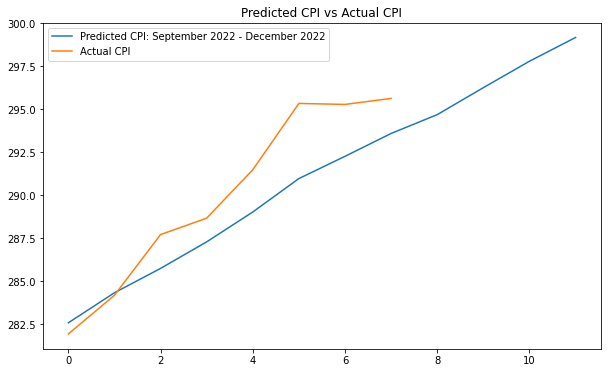

In [68]:
plt.figure(figsize=(10,6))
plt.plot(cpi_2022['cpi_prediction'],label="Predicted CPI: September 2022 - December 2022")
plt.plot(cpi_2022['cpi_actual_data'],label="Actual CPI")
plt.title("Predicted CPI vs Actual CPI")
print('Predicted CPI vs Actual CPI')
plt.legend()

**Predicted CPI vs Actual CPI**

* Predicted CPI values corresponded correctly to Actual CPI. 
* However, in June 2022 the Actual CPI was significantly higher than the Predicted CPI values.

### Actual CPI vs Actual HPI

Actual CPI vs Actual HPI: January 2022 - August 2022


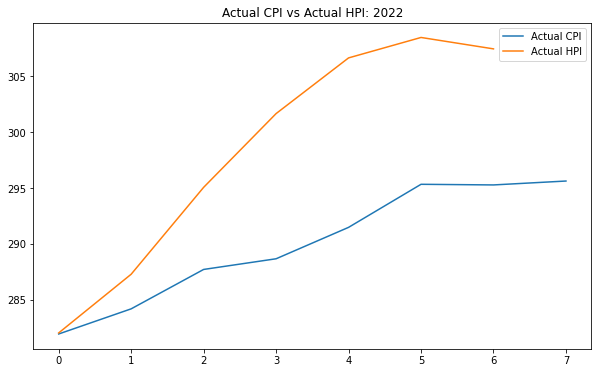

In [69]:
plt.figure(figsize=(10,6))
plt.plot(cpi_hpi_2022['cpi_actual_data'],label="Actual CPI")
plt.plot(cpi_hpi_2022['hpi_actual_data'],label="Actual HPI")
plt.title("Actual CPI vs Actual HPI: 2022")
print('Actual CPI vs Actual HPI: January 2022 - August 2022')
plt.legend()

**Actual CPI vs Actual HPI: January 2022 - August 2022**

* Q1: Graph shows growth in home prices compared to the trend in consumer prices.
* Q2: Home prices grow much faster than inflation.
* Q3: The beginning of Q1 shows a slowing trend in both CPI & HPI.

### Predicted CPI vs Predicted HPI

Predicted CPI vs Predicted HPI: January 2022 - December 2022


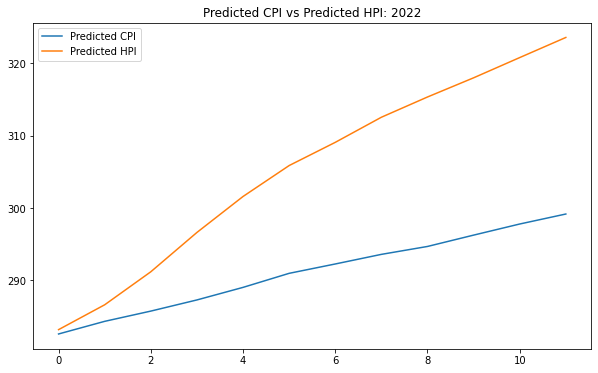

In [70]:
plt.figure(figsize=(10,6))
plt.plot(cpi_2022['cpi_prediction'],label="Predicted CPI")
plt.plot(hpi_2022['hpi_prediction'],label="Predicted HPI")
plt.title("Predicted CPI vs Predicted HPI: 2022")
print('Predicted CPI vs Predicted HPI: January 2022 - December 2022')
plt.legend()

**Predicted CPI vs Predicted HPI: January 2022 - December 2022**

* Q1: Graph shows growth in home prices compared to the trend in consumer prices.
* Q2: Home prices grow faster than inflation.
* Q3: The difference in performance is increasing further.
* Q4: Home prices continue to skyrocket, growing faster than inflation.

### CPI Forecast: 2012-2022

Blue line: Forecast CPI.
Black dots: Actual CPI.
Period: 2012-2022


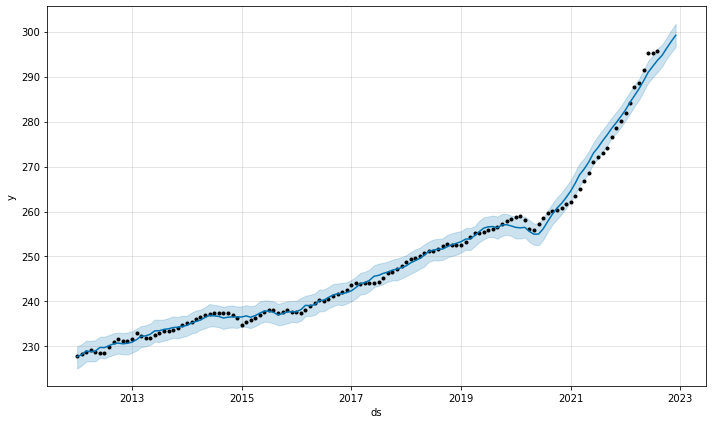

In [71]:
print('Blue line: Forecast CPI.')
print('Black dots: Actual CPI.')
print('Period: 2012-2022')
fig1

CPI Machine Learning model has demonstrated great predictive performance.

### HPI Forecast: 2012-2022

Blue line: Forecast HPI.
Black dots: Actual HPI.
Period: 2012-2022


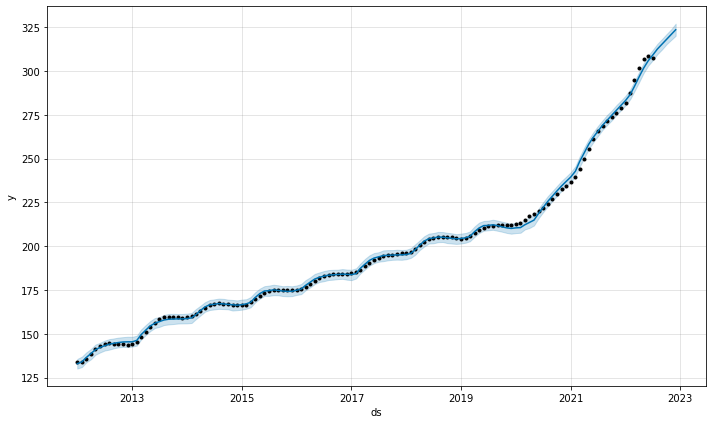

In [72]:
print('Blue line: Forecast HPI.')
print('Black dots: Actual HPI.')
print('Period: 2012-2022')
fig3

HPI Machine Learning model has demonstrated great predictive performance.

# Conclusion

2022: CPI & HPI. Actual & Predicted data combined.


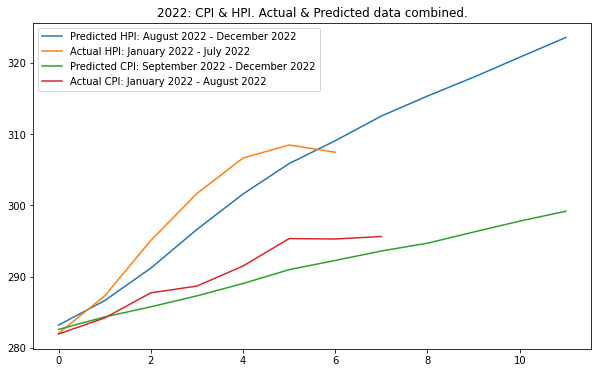

In [73]:
plt.figure(figsize=(10,6))
plt.plot(cpi_hpi_2022['hpi_prediction'], label="Predicted HPI: August 2022 - December 2022")
plt.plot(cpi_hpi_2022['hpi_actual_data'],label="Actual HPI: January 2022 - July 2022")
plt.plot(cpi_hpi_2022['cpi_prediction'], label="Predicted CPI: September 2022 - December 2022")
plt.plot(cpi_hpi_2022['cpi_actual_data'],label="Actual CPI: January 2022 - August 2022")
plt.title("2022: CPI & HPI. Actual & Predicted data combined.")
print('2022: CPI & HPI. Actual & Predicted data combined.')
plt.legend()

> **The CPI will continue to fall behind the growth of HPI during entire 2022**.

Greater growth in home prices compared to the trend in consumer prices is proven by data analysis in this project. 
* That is, home prices grow faster than inflation.
___

## Insights

Growing HPI trend will most probably continue until the end of the year 2022. That is proven by predicted data:
* Predicted values for July 2022: HPI (309.06) vs CPI (292.25)
* Predicted values for December 2022: HPI (323.56, 4.69% increase) vs CPI (299.16, 2.36% increase)


* The Consumer Price Index has been linearly increasing since 1947.
* CPI's peak months: February and October.
* The Home Price Index has been linearly increasing since 1987.
* HPI's peak months: March, April, May and December.

>Q: **Why is the HPI is skyrocketing?** The low supply of houses for sale in 2022 > Investment purchases 2021-2022.

>A: The number of houses for sale = (the number of houses put up for sale - the number of houses sold). Investors are buying the houses for many reasons, including the rise of short-term rentals and  government incentives (tax breaks).

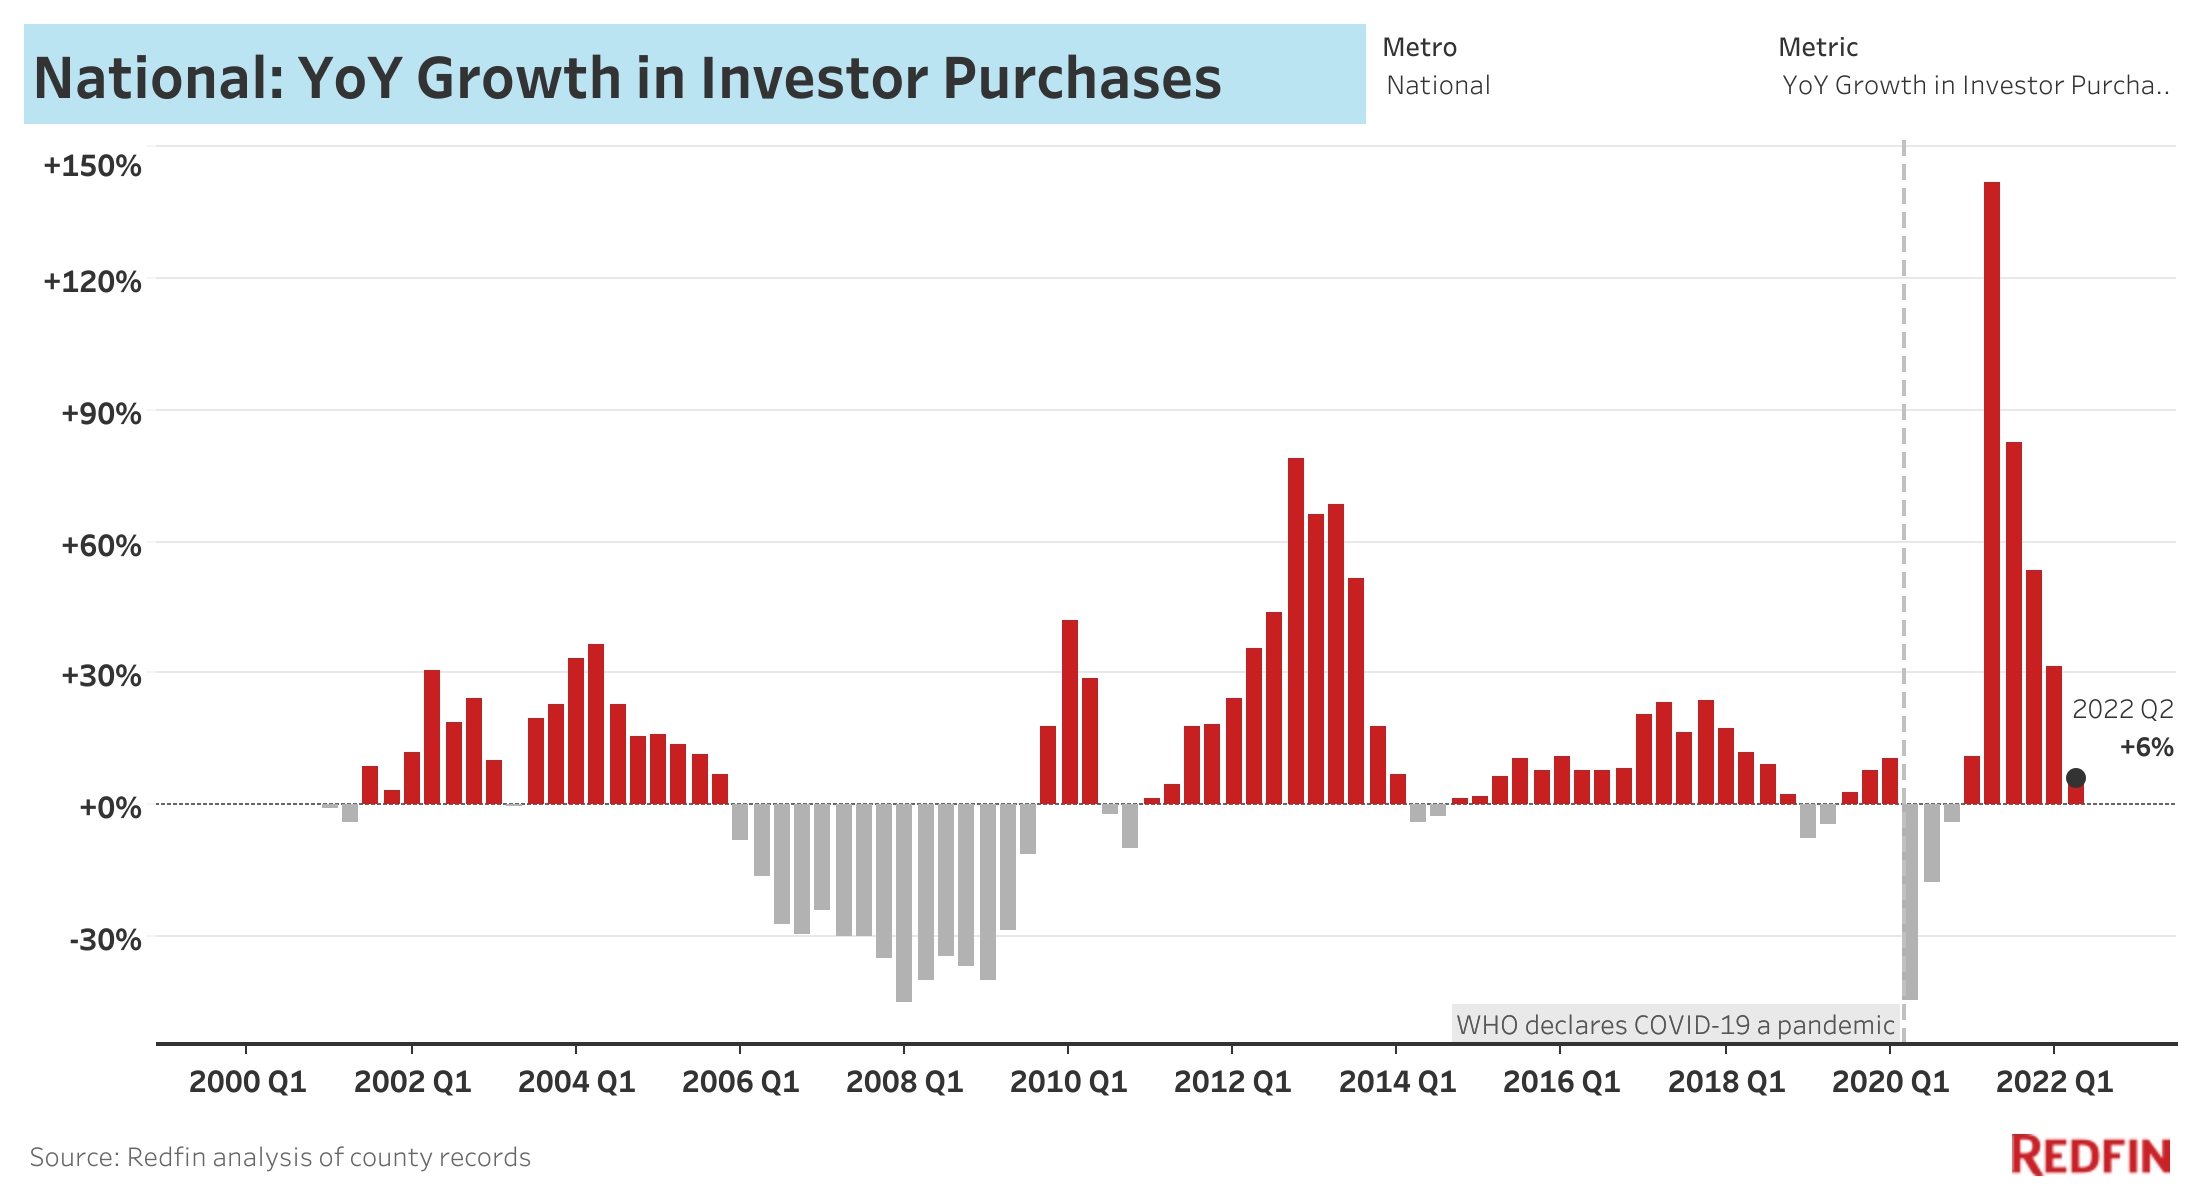

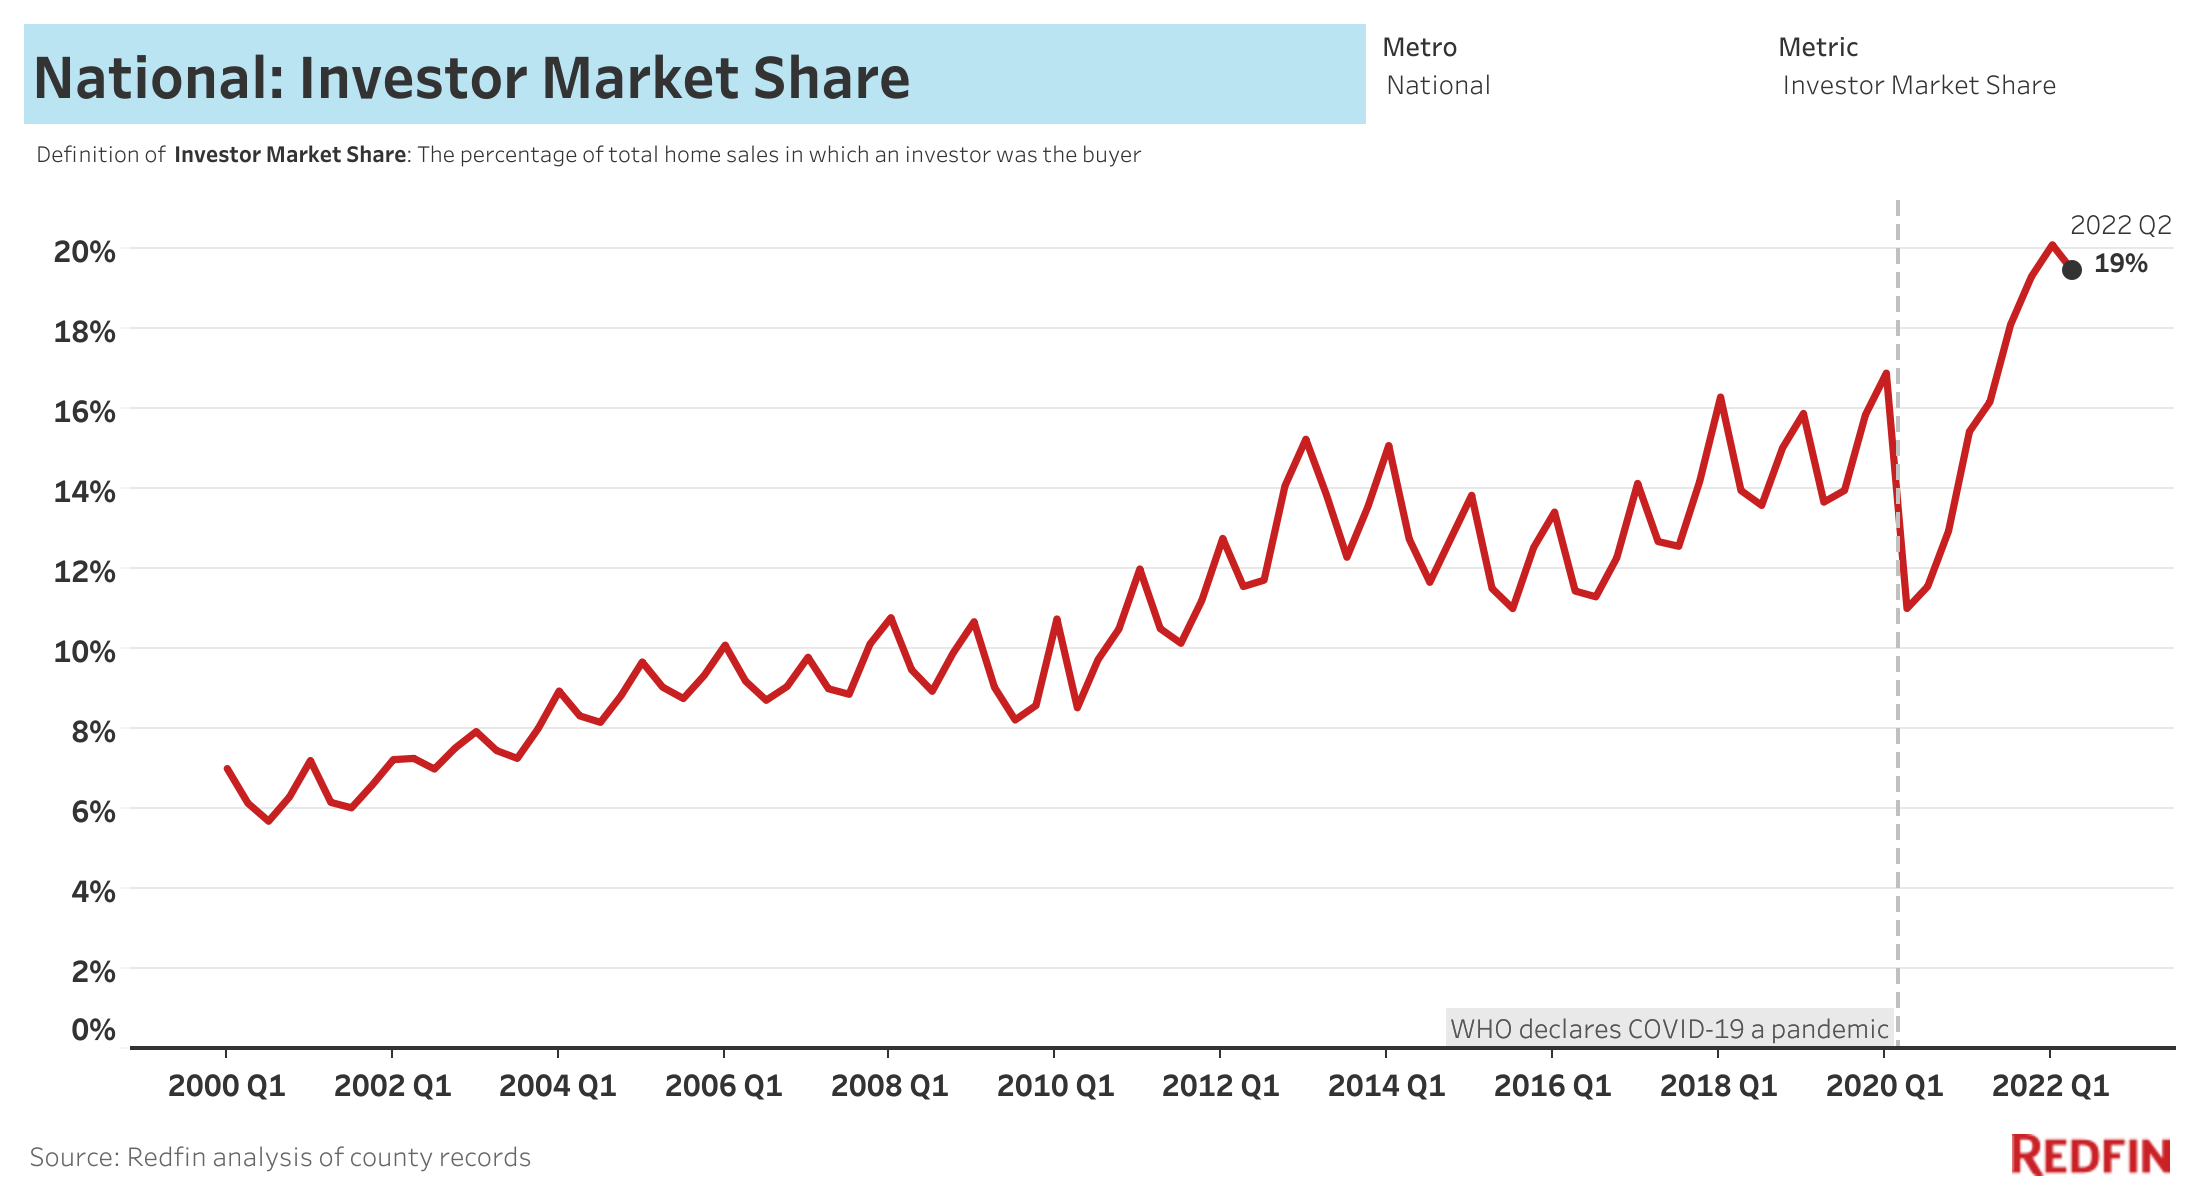

___
<p><img style="display: block; margin-left: auto; margin-right: auto;" src="https://avatars.githubusercontent.com/u/99581812?v=4" alt="" width="89" height="89" /></p>
<p style="text-align: center;">Connect with me:</p>
<p style="text-align: center;"><a href="https://t.me/gavrilov_se" target="blank"><img src="https://www.svgrepo.com/show/349527/telegram.svg" alt="Telegram_Alexander_Gavrilov_Data_Scientist" width="40" height="30" align="center" /></a></p>
<p style="text-align: center;"><a href="mailto:alexander@gavrilov.se" target="blank"><img src="https://www.clipartmax.com/png/full/91-913506_computer-icons-email-address-clip-art-icon-email-vector-png.png" alt="Email_Alexander_Gavrilov_Data_Scientist" width="30" height="30" align="center" /></a>&nbsp;</p>